In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load the CSV file 
housedf = pd.read_csv("house_price_dataset.csv")
housedf.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [24]:
# STEP 2: Make a clean copy and drop unused columns
df = housedf.copy()
df = df.drop(columns=['date','country','street','city','statezip'])  # Not useful for modeling
df.head(5)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [25]:
# STEP 3: Handling missing values
df = df.dropna()
#df

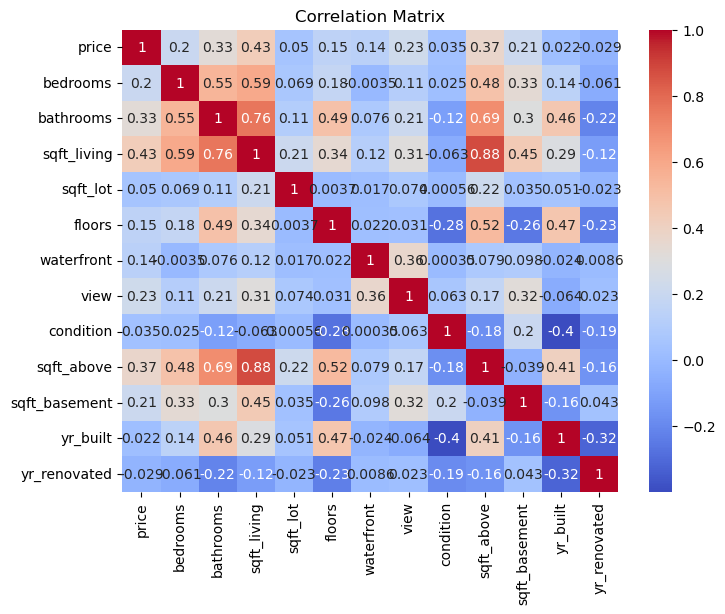

In [26]:
# STEP 4: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [27]:

# Select only the features you want
X = housedf[['sqft_living','bedrooms','bathrooms']]
y = housedf['price']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression:")
print(f"  R² score: {r2:.4f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")



Linear Regression:
  R² score: 0.0281
  RMSE: 995592.71
  MAE: 223980.25


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2 = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest:")
print(f"  R² score: {r2:.4f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")


Random Forest:
  R² score: 0.0035
  RMSE: 1008126.36
  MAE: 245419.19


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Features and target
X = housedf[['sqft_living', 'bathrooms', 'bedrooms', 'street', 'city', 'statezip']]
y = housedf['price']

# Defining categorical columns
cat_cols = ['statezip', 'street', 'city']

# Preprocessor: OneHotEncode categoricals
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')  # pass through other features

# Model pipeline
model = Pipeline([
    ('preprocess', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Random Forest with location features:")
print(f"  R² score: {r2:.4f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")


Random Forest with location features:
  R² score: 0.0520
  RMSE: 983281.56
  MAE: 153744.74


In [30]:
# Calculating IQR bounds
q25 = housedf['price'].quantile(0.25)
q75 = housedf['price'].quantile(0.75)

# Filter dataset to only include rows within IQR
housedf_iqr = housedf[(housedf['price'] >= q25) & (housedf['price'] <= q75)]

print(f"Original dataset size: {housedf.shape}")
print(f"IQR filtered dataset size: {housedf_iqr.shape}")

Original dataset size: (4600, 18)
IQR filtered dataset size: (2300, 18)


In [32]:
X = housedf_iqr[['sqft_living', 'bathrooms', 'bedrooms', 'statezip', 'street', 'city']]
y = housedf_iqr['price']

# Defining categorical columns
cat_cols = ['statezip', 'street', 'city']

# Preprocessor: OneHotEncode categoricals
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')  # pass through other features

# Model pipeline
model = Pipeline([
    ('preprocess', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Random Forest with location features:")
print(f"  R² score: {r2:.4f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")


Random Forest with location features:
  R² score: 0.4224
  RMSE: 69943.38
  MAE: 54267.96
